<a href="https://colab.research.google.com/github/ge43jef/GEEHYDRO/blob/perfectdatacodes/7july_final_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from glob import glob

files = glob('FLX*')

dataframes = []

columns_to_read = ["SW_IN_F","LW_IN_F", "PA_F", "WS_F", "VPD_F", "temperature_2m", "total_precipitation_sum", "LE_CORR"]

for file in files:
    df = pd.read_excel(file, usecols=columns_to_read)  # Replace read_excel with the appropriate function for your file format
    dataframes.append(df)

# Concatenate all the DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Now you can use the combined_df DataFrame for further analysis or processing

combined_df


,SW_IN_F,LW_IN_F,VPD_F,PA_F,WS_F,LE_CORR,temperature_2m,total_precipitation_sum
0,122.530,258.526,4.984,99.723,2.006,110.1210,279.935384,1.700000e-06
1,108.610,263.426,5.698,100.161,2.437,100.2840,280.098930,0.000000e+00
2,132.525,272.166,5.970,100.302,1.492,96.5670,280.676259,4.350000e-07
3,137.068,264.763,5.308,99.875,1.002,110.4000,280.543123,0.000000e+00
4,131.773,264.651,5.374,99.522,1.055,100.7200,280.454137,1.280000e-06
...,...,...,...,...,...,...,...,...
17525,96.744,257.042,1.750,102.643,0.971,29.0690,280.321662,0.000000e+00
17526,117.460,268.529,2.464,102.492,0.638,29.7458,280.833206,8.550000e-07
17527,65.695,276.439,1.255,102.092,1.195,23.5720,280.310670,9.610000e-05
17528,133.985,237.433,4.854,102.059,7.740,46.6856,280.379863,1.010000e-05


In [32]:
count_9999 = (combined_df["LE_CORR"] == -9999).sum()
print("Number of values with -9999 in LE_CORR:", count_9999)


Number of values with -9999 in LE_CORR: 121


In [34]:
combined_df = combined_df[combined_df["LE_CORR"] != -9999]


In [35]:
combined_df.shape

(17409, 8)

In [36]:
X = combined_df.drop("LE_CORR", axis=1)
y = combined_df["LE_CORR"]
X.shape

(17409, 7)

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Select columns to scale (excluding "total_precipitation_sum")
columns_to_scale = X.columns[X.columns != "total_precipitation_sum"]

# Scale the selected columns in X
X_scaled = X.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
X_scaled

,SW_IN_F,LW_IN_F,VPD_F,PA_F,WS_F,temperature_2m,total_precipitation_sum
0,0.309433,0.248349,0.107206,0.805590,0.157629,0.335365,1.700000e-06
1,0.274262,0.267248,0.122564,0.829132,0.199514,0.339114,0.000000e+00
2,0.334686,0.300958,0.128415,0.836711,0.107677,0.352352,4.350000e-07
3,0.346164,0.272405,0.114175,0.813760,0.060058,0.349299,0.000000e+00
4,0.332786,0.271973,0.115595,0.794786,0.065209,0.347259,1.280000e-06
...,...,...,...,...,...,...,...
17525,0.244282,0.242626,0.037643,0.962537,0.057046,0.344221,0.000000e+00
17526,0.296623,0.286930,0.053001,0.954421,0.024684,0.355950,8.550000e-07
17527,0.165833,0.317439,0.026995,0.932921,0.078814,0.343969,9.610000e-05
17528,0.338375,0.166995,0.104410,0.931148,0.714869,0.345556,1.010000e-05


In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [100]:
kf = KFold(n_splits=15)
for train, test in kf.split(X_scaled):
    X_train, X_test, y_train, y_test = np.array(X_scaled)[train], np.array(X_scaled)[test], np.array(y)[train], np.array(y)[test]
    tree1 = DecisionTreeRegressor(max_depth=8)
    tree2 = RandomForestRegressor(max_depth=12)
    tree1.fit(X_train, y_train)
    tree2.fit(X_train, y_train)
    y_pred1 = tree1.predict(X_test)
    y_pred2 = tree2.predict(X_test)

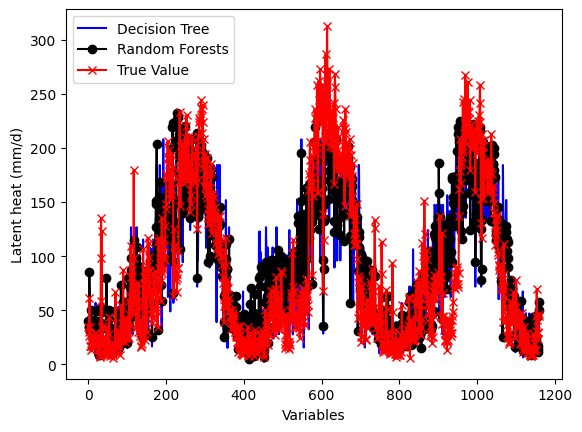

In [101]:
# plot the data
# Plot the data points
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot( y_pred1, c='b',label='Decision Tree')
plt.plot( y_pred2, marker='o', c='black',label='Random Forests')
plt.plot( y_test, marker='x', c='r',label='True Value')
# Set the y-axis label
plt.ylabel('Latent heat (mm/d)')
# Set the x-axis label
plt.xlabel('Variables')
plt.legend()
plt.show()

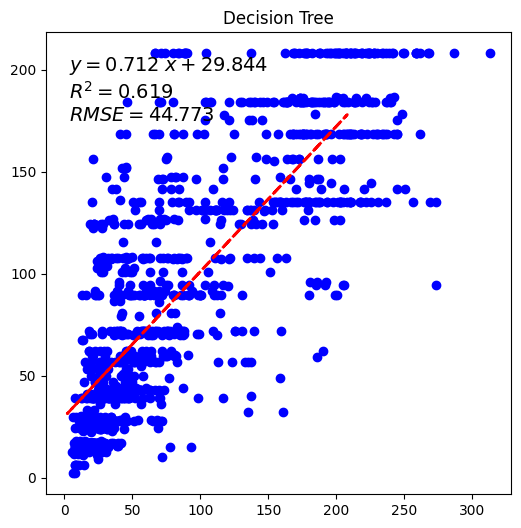

In [102]:
fig,ax=plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.scatter( y_test , y_pred1, c='b')
z = np.polyfit(y_test , y_pred1, 1)
y_hat = np.poly1d(z)(y_pred1)
plt.plot(y_pred1, y_hat, "r--", lw=2)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y_test, y_hat):0.3f}$\n" \
                   f"$RMSE = {mean_squared_error(y_test, y_hat, squared=False):0.3f} $ "
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
                           fontsize=14, verticalalignment='top')
plt.title('Decision Tree')
plt.show()

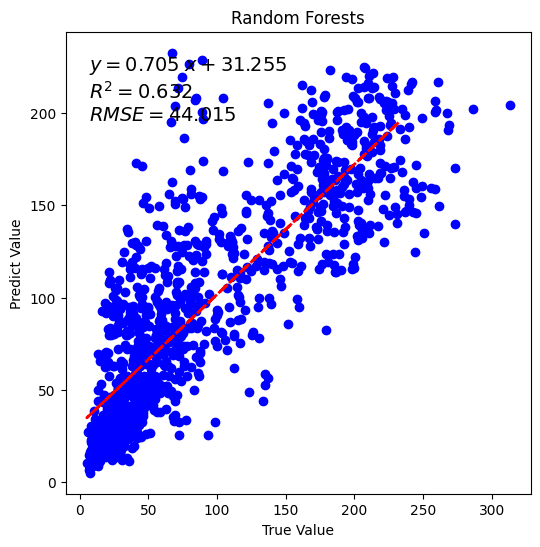

In [103]:
fig,ax=plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.scatter( y_test , y_pred2, c='b')
z = np.polyfit(y_test , y_pred2, 1)
y_hat = np.poly1d(z)(y_pred2)
plt.plot(y_pred2, y_hat, "r--", lw=2)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y_test, y_hat):0.3f}$\n" \
                   f"$RMSE = {mean_squared_error(y_test, y_hat, squared=False):0.3f} $ "
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
                           fontsize=14, verticalalignment='top')
plt.ylabel('Predict Value')
# Set the x-axis label
plt.xlabel('True Value')
plt.title('Random Forests')
plt.show()